<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_24_Tinder_Millennial_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement : Predict if the relationship succeeded or not**


**About the Data**

The dataset contains information about  the match rate of the individuals from different universities, and whether the app (i.e. Tinder) has helped them find a relationship.

Data Description

* ID : User id
* Segment type : Medium of Usage
* Segment Description : Name of Universities
* Answer : Do you use tinder ?
* Count : Number of Matches
* Percentage : % of matches
* It became a relationship : Success of relationship **(Target)**

## Loading Libraries

In [3]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Training Dataset

In [4]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv")

In [ ]:
train_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


## Loading Test Dataset

In [5]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [ ]:
test_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage
0,292974.2311,university,"University of California, Davis",Yes,0.230742,0.115371
1,292889.7996,web,"Meridian, Idaho",No,0.000000,0.000000
2,293724.0350,university,"Westport, CT",Yes,0.000000,0.000000
3,292884.0724,mobile,"Meridian, Idaho",No,1497.699982,0.388752
4,292882.0964,mobile,"Meridian, Idaho",No,1439.464988,0.373646


## Basic EDA

In [6]:
train_data.shape

(1896, 7)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   object 
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 103.8+ KB


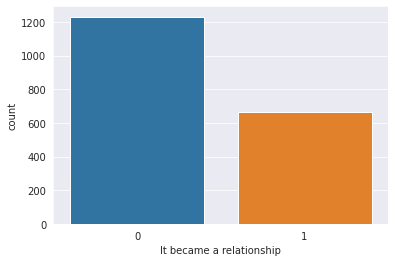

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(train_data['It became a relationship'])

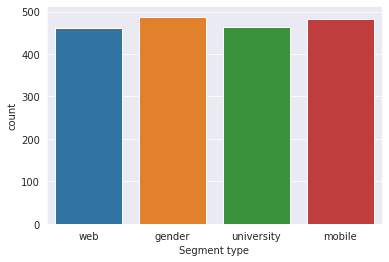

In [ ]:
sns.countplot(train_data['Segment type'])

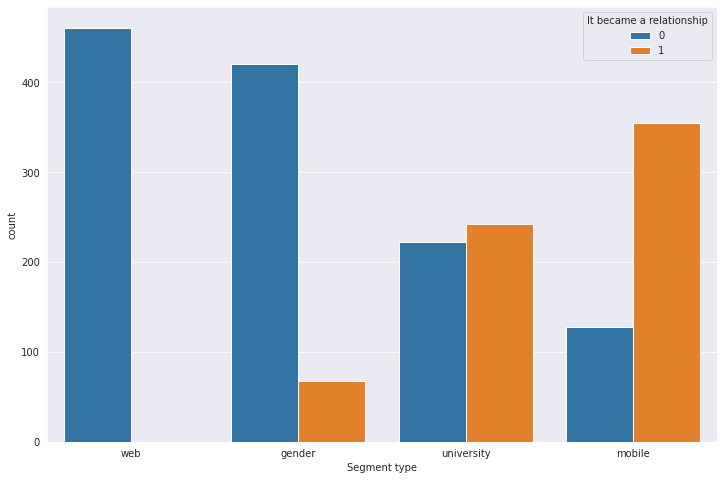

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x = 'Segment type',data=train_data,hue='It became a relationship')
plt.show()

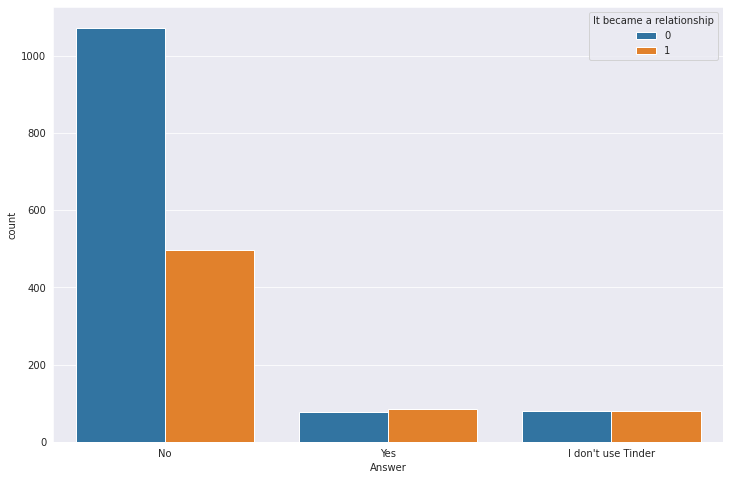

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x = 'Answer',data=train_data,hue='It became a relationship')
plt.show()

In [ ]:
test_data['Answer'].unique()

array(['Yes', 'No', "I don't use Tinder"], dtype=object)

In [8]:
def split_segment1(x):
  seg = x.split(",")
  return seg[0]

#
def split_segment2(x):
  seg = x.split(",")
  return seg[-1]

In [9]:
train_data['Segmnet_1'] = train_data['Segment Description'].apply(lambda x : split_segment1(x))
train_data['Segmnet_2'] = train_data['Segment Description'].apply(lambda x : split_segment2(x))

In [10]:
test_data['Segmnet_1'] = test_data['Segment Description'].apply(lambda x : split_segment1(x))
test_data['Segmnet_2'] = test_data['Segment Description'].apply(lambda x : split_segment2(x))

In [ ]:
train_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship,Segmnet_1,Segmnet_2
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0,Meridian,Idaho
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0,Meridian,Idaho
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0,Meridian,Idaho
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0,Meridian,Idaho
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0,Meridian,Idaho


In [ ]:
train_data.Segmnet_1.nunique(),train_data.Segmnet_2.nunique()

(143, 148)

In [ ]:
train_data.ID.nunique(),test_data.ID.nunique()

(1888, 631)

In [ ]:
train_data.shape,test_data.shape

((1896, 9), (632, 8))

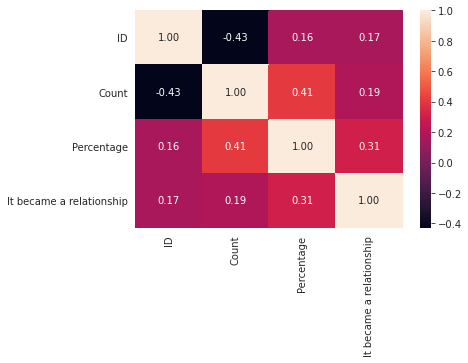

In [ ]:
sns.heatmap(train_data.corr(),annot=True,fmt=".2f")

In [11]:
test_data.drop('Segment Description',axis=1,inplace=True)
train_data.drop('Segment Description',axis=1,inplace=True)

In [12]:
cat_cols =  [col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_cols

['Segment type', 'Answer', 'Segmnet_1', 'Segmnet_2']

In [13]:
cat_features_index = np.where(train_data.dtypes == object)[0]
cat_features_index

array([1, 2, 6, 7])

In [17]:
!pip install catboost

     |████████████████████████████████| 65.8MB 81kB/s 


In [14]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [15]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
#differentiate traget from features
X = train_data.drop('It became a relationship',axis=1)
Y = train_data['It became a relationship']

In [18]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Evaluation Metrics

In [19]:
from sklearn.model_selection import cross_val_score
def f1_weighted(y_true,y_pred):
  score = f1_score(y_true,y_pred,average='weighted')
  return score
scorer = make_scorer(f1_weighted,greater_is_better=True)

## Label Encoding Variables

#### Here we have used a technique to handle missing categories in test data 

In [43]:
cat_cols

['Segment type', 'Answer', 'Segmnet_1', 'Segmnet_2']

In [21]:
train_new = train_data.copy()
test_new = test_data.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
# train and test are pandas.DataFrame's and c is whatever column
le = LabelEncoder()
le.fit(train_new['Segment type'])
test_new['Segment type'] = test_new['Segment type'].map(lambda s: 'unknown' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, 'unknown')
train_new['Segment type'] = le.transform(train_new['Segment type'])
test_new['Segment type'] = le.transform(test_new['Segment type'])

In [23]:
le.classes_ 

array(['gender', 'mobile', 'university', 'web', 'unknown'], dtype=object)

In [24]:
le1 = LabelEncoder()
le1.fit(train_new['Answer'])
test_new['Answer'] = test_new['Answer'].map(lambda s: 'unknown' if s not in le1.classes_ else s)
le1.classes_ = np.append(le1.classes_, 'unknown')
train_new['Answer'] = le1.transform(train_new['Answer'])
test_new['Answer'] = le1.transform(test_new['Answer'])

In [25]:
le1.classes_ 

array(["I don't use Tinder", 'No', 'Yes', 'unknown'], dtype=object)

In [26]:
train_new.head()

,ID,Segment type,Answer,Count,Percentage,It became a relationship,Segmnet_1,Segmnet_2
0,292890.8970,3,1,0.000000,0.000000,0,Meridian,Idaho
1,292887.9870,3,1,0.000000,0.000000,0,Meridian,Idaho
2,292894.0656,0,1,499.173606,0.225255,0,Meridian,Idaho
3,292887.1180,3,1,0.000000,0.000000,0,Meridian,Idaho
4,292893.6561,0,1,455.925963,0.211360,0,Meridian,Idaho


In [27]:
le2 = LabelEncoder()
le2.fit(train_new['Segmnet_1'])
test_new['Segmnet_1'] = test_new['Segmnet_1'].map(lambda s: 'unknown' if s not in le2.classes_ else s)
le2.classes_ = np.append(le2.classes_, 'unknown')
train_new['Segmnet_1'] = le2.transform(train_new['Segmnet_1'])
test_new['Segmnet_1'] = le2.transform(test_new['Segmnet_1'])

In [28]:
le2.classes_ 

array(['Appalachian State University', 'Arizona State University',
       'Arkansas State University', 'Auburn University',
       'Baylor University', 'Boston College', 'Boston University',
       'Brigham Young University', 'Butler University',
       'Cal Poly San Luis Obispo', 'Cal State Northridge',
       'Carnegie Mellon University', 'Case Western Reserve University',
       'Castleton State College', 'Centre College', 'Chapman University',
       'Clemson University', 'Colby College',
       'College of William and Mary', 'Colorado State University',
       'Columbia University', 'Cornell University', 'Dartmouth College',
       'Duke University', 'Elon University', 'Emory University',
       'Female respondents', 'Florida International University',
       'Florida State University', 'George Washington University',
       'Georgetown University', 'Gonzaga University',
       'Harvard University', 'Illinois State', 'Indiana University',
       'Iowa State University', 'Ithaca Co

In [29]:
le3 = LabelEncoder()
le3.fit(train_new['Segmnet_2'])
test_new['Segmnet_2'] = test_new['Segmnet_2'].map(lambda s: 'unknown' if s not in le3.classes_ else s)
le3.classes_ = np.append(le3.classes_, 'unknown')
train_new['Segmnet_2'] = le3.transform(train_new['Segmnet_2'])
test_new['Segmnet_2'] = le3.transform(test_new['Segmnet_2'])

In [30]:
le3.classes_ 

array([' Berkeley', ' CT', ' Davis', ' Eau Claire', ' Idaho',
       ' Los Angeles', ' San Diego', ' Santa Barbara', ' Santa Cruz',
       'Appalachian State University', 'Arizona State University',
       'Arkansas State University', 'Auburn University',
       'Baylor University', 'Boston College', 'Boston University',
       'Brigham Young University', 'Butler University',
       'Cal Poly San Luis Obispo', 'Cal State Northridge',
       'Carnegie Mellon University', 'Case Western Reserve University',
       'Castleton State College', 'Centre College', 'Chapman University',
       'Clemson University', 'Colby College',
       'College of William and Mary', 'Colorado State University',
       'Columbia University', 'Cornell University', 'Dartmouth College',
       'Duke University', 'Elon University', 'Emory University',
       'Female respondents', 'Florida International University',
       'Florida State University', 'George Washington University',
       'Georgetown University', '

In [31]:
train_new.head()

,ID,Segment type,Answer,Count,Percentage,It became a relationship,Segmnet_1,Segmnet_2
0,292890.8970,3,1,0.000000,0.000000,0,46,4
1,292887.9870,3,1,0.000000,0.000000,0,46,4
2,292894.0656,0,1,499.173606,0.225255,0,46,4
3,292887.1180,3,1,0.000000,0.000000,0,46,4
4,292893.6561,0,1,455.925963,0.211360,0,46,4


## Classifiers used for Stacking

In [32]:
etc = ExtraTreesClassifier()
etc

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [33]:
X = train_new.drop('It became a relationship',axis=1)
Y = train_new['It became a relationship']

In [89]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1500,2000],
    'random_state' : [42,100,500,720]
    }
etc = ExtraTreesClassifier()
grid = GridSearchCV(etc, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.6min finished


{'max_depth': 8, 'n_estimators': 500, 'random_state': 42}
0.9061283155117345


In [34]:
etc = ExtraTreesClassifier(max_depth=8,n_estimators=500,random_state=42)

In [91]:
lgb = LGBMClassifier()
lgb

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [92]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1500,2000],
    'learning_rate': [0.0001,0.005, 0.01],
    'random_state' : [42,100,500,720]
    }
lgb = LGBMClassifier()
grid = GridSearchCV(lgb, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.2min finished


{'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 2000, 'random_state': 42}
0.9119191778919594


In [35]:
lgb = LGBMClassifier(learning_rate = 0.005, max_depth=4,n_estimators=2000,random_state=42)

## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
gridParams = {
    'max_depth': [3,4,6,8],
    'n_estimators': [100,200,500,1500,2000],
    'random_state' : [42,100,500,720]
    }
xgb = XGBClassifier()
grid = GridSearchCV(xgb, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.4min finished


{'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
0.914560477711429


In [44]:
xgb = XGBClassifier(max_depth = 3,n_estimators=100,random_state=42)

In [100]:
gridParams = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1500,2000],
     'class_weight' : [{0:1,1:2},{0:1,1:2},{0:2,1:4}],
    'random_state' : [42,100,500,720]
    }
lgb = LGBMClassifier()
grid = GridSearchCV(lgb, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.7min finished


{'class_weight': {0: 1, 1: 2}, 'max_depth': 8, 'n_estimators': 2000, 'random_state': 42}
0.9113956394945146


In [38]:
rf = RandomForestClassifier(class_weight= {0: 1, 1: 2}, 
max_depth = 8, 
n_estimators = 2000, 
random_state = 42)

In [39]:
cat = CatBoostClassifier(learning_rate =0.005, n_estimators =1500, random_state = 42)

##Stacking 

In [45]:
estimator = [("rf",rf),("lgb",lgb),("xgb",xgb),("cat",cat)]
clf = StackingClassifier(estimators=estimator)
scores = cross_val_score(clf,X,Y,cv=5,scoring=scorer)

Streaming output truncated to the last 5000 lines.
1000:	learn: 0.1273986	total: 1.69s	remaining: 841ms
1001:	learn: 0.1273560	total: 1.69s	remaining: 840ms
1002:	learn: 0.1272611	total: 1.69s	remaining: 838ms
1003:	learn: 0.1271970	total: 1.69s	remaining: 836ms
1004:	learn: 0.1271285	total: 1.69s	remaining: 834ms
1005:	learn: 0.1270505	total: 1.7s	remaining: 833ms
1006:	learn: 0.1269940	total: 1.7s	remaining: 831ms
1007:	learn: 0.1269557	total: 1.7s	remaining: 829ms
1008:	learn: 0.1269051	total: 1.7s	remaining: 827ms
1009:	learn: 0.1268178	total: 1.7s	remaining: 826ms
1010:	learn: 0.1267516	total: 1.7s	remaining: 824ms
1011:	learn: 0.1266502	total: 1.71s	remaining: 822ms
1012:	learn: 0.1265857	total: 1.71s	remaining: 820ms
1013:	learn: 0.1265214	total: 1.71s	remaining: 819ms
1014:	learn: 0.1264563	total: 1.71s	remaining: 817ms
1015:	learn: 0.1264321	total: 1.71s	remaining: 815ms
1016:	learn: 0.1263716	total: 1.71s	remaining: 814ms
1017:	learn: 0.1263308	total: 1.71s	remaining: 812ms
1

In [46]:
scores

array([0.92118675, 0.91733599, 0.91813443, 0.93420242, 0.92926191])

In [47]:
import numpy as np
np.mean(scores)

0.9240243006661167

**Tried stacking validation accuracy came to be 92.40%**

## Hyperparameter Optimization using Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0001,0.005, 0.01],
    'n_estimators': [500,1000,1500,2000],
    'random_state' : [42,100,500,720]
    }
catboost = CatBoostClassifier()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.7min finished


0:	learn: 0.6856540	total: 51.6ms	remaining: 1m 17s
1:	learn: 0.6781039	total: 55ms	remaining: 41.2s
2:	learn: 0.6700925	total: 57.9ms	remaining: 28.9s
3:	learn: 0.6618781	total: 61.2ms	remaining: 22.9s
4:	learn: 0.6531360	total: 64.4ms	remaining: 19.2s
5:	learn: 0.6458069	total: 67.2ms	remaining: 16.7s
6:	learn: 0.6382365	total: 69.8ms	remaining: 14.9s
7:	learn: 0.6317397	total: 72.2ms	remaining: 13.5s
8:	learn: 0.6253480	total: 74.1ms	remaining: 12.3s
9:	learn: 0.6178938	total: 76.6ms	remaining: 11.4s
10:	learn: 0.6107374	total: 79.4ms	remaining: 10.7s
11:	learn: 0.6038422	total: 82.3ms	remaining: 10.2s
12:	learn: 0.5972254	total: 84.6ms	remaining: 9.68s
13:	learn: 0.5922972	total: 86.8ms	remaining: 9.21s
14:	learn: 0.5857538	total: 89.7ms	remaining: 8.88s
15:	learn: 0.5792545	total: 92.7ms	remaining: 8.6s
16:	learn: 0.5721889	total: 95.9ms	remaining: 8.37s
17:	learn: 0.5688272	total: 97.9ms	remaining: 8.06s
18:	learn: 0.5631463	total: 101ms	remaining: 7.88s
19:	learn: 0.5565853	tota

Note : best scores : 95.88% 

## Applying Stratified KFold Split - Catboost Classifier

Streaming output truncated to the last 5000 lines.
1008:	learn: 0.1411675	total: 2.19s	remaining: 1.07s
1009:	learn: 0.1411652	total: 2.19s	remaining: 1.06s
1010:	learn: 0.1410872	total: 2.19s	remaining: 1.06s
1011:	learn: 0.1410302	total: 2.2s	remaining: 1.06s
1012:	learn: 0.1409880	total: 2.2s	remaining: 1.06s
1013:	learn: 0.1409281	total: 2.2s	remaining: 1.06s
1014:	learn: 0.1408943	total: 2.21s	remaining: 1.05s
1015:	learn: 0.1406900	total: 2.21s	remaining: 1.05s
1016:	learn: 0.1406750	total: 2.21s	remaining: 1.05s
1017:	learn: 0.1406502	total: 2.22s	remaining: 1.05s
1018:	learn: 0.1406232	total: 2.22s	remaining: 1.05s
1019:	learn: 0.1406043	total: 2.22s	remaining: 1.04s
1020:	learn: 0.1405140	total: 2.22s	remaining: 1.04s
1021:	learn: 0.1404763	total: 2.23s	remaining: 1.04s
1022:	learn: 0.1404763	total: 2.23s	remaining: 1.04s
1023:	learn: 0.1404620	total: 2.23s	remaining: 1.04s
1024:	learn: 0.1404336	total: 2.23s	remaining: 1.03s
1025:	learn: 0.1402255	total: 2.23s	remaining: 1.03

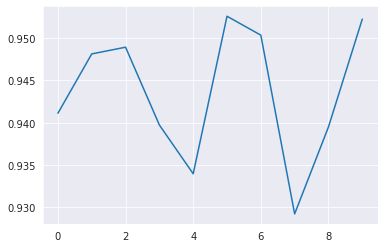

In [ ]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostClassifier(learning_rate =0.005, n_estimators =1500, random_state = 42)    

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


In [ ]:
pred = grid.best_estimator_.predict(test_data)

## Save predictions on test data

In [ ]:
res = pd.DataFrame(pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("sub_catboost.csv",index=False) # the csv file will be saved locally on the same location where this notebook is located.

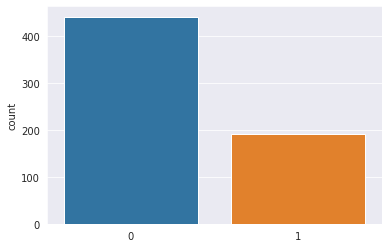

In [ ]:
sns.countplot(pred)

https://dphi.tech/practice/challenge/60#leaderboard

**Basic Catboost Model Scores Submission: 95.25316455696202**

## Using AutoML - Pycaret

In [ ]:
train_data.to_csv('train_processed.csv',index=False)
test_data.to_csv('test_processed.csv',index=False)

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 5.6MB/s 
     |████████████████████████████████| 157.5MB 35kB/s 
     |████████████████████████████████| 1.7MB 61.3MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 276kB 61.9MB/s 
     |████████████████████████████████| 1.8MB 56.1MB/s 
     |████████████████████████████████| 174kB 72.1MB/s 
     |████████████████████████████████| 245kB 34.2MB/s 
     |████████████████████████████████| 6.8MB 75.9MB/s 
     |████████████████████████████████| 14.2MB 197kB/s 
     |████████████████████████████████| 2.1MB 52.2MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 604kB 44.9MB/s 
     |████████████████████████████████| 3.1MB 59.8MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 153kB 68.6MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 163kB 64.2MB/s

In [ ]:
import pandas as pd
train = pd.read_csv("/content/train_processed.csv")
test = pd.read_csv("/content/test_processed.csv")

In [ ]:
# Importing module and initializing setup 
from pycaret.classification import * 
clf1 = setup(data = train, target = 'It became a relationship') 

,Description,Value
0,session_id,919
1,Target,It became a relationship
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1896, 8)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9435,0.9838,0.8882,0.9469,0.9152,0.8729,0.8753,0.291
rf,Random Forest Classifier,0.9276,0.9832,0.8883,0.9011,0.8936,0.8388,0.8400,0.303
catboost,CatBoost Classifier,0.9088,0.9769,0.8863,0.8569,0.8705,0.8003,0.8015,1.287
lightgbm,Light Gradient Boosting Machine,0.9020,0.9739,0.8576,0.8576,0.8572,0.7826,0.7831,0.042
gbc,Gradient Boosting Classifier,0.9013,0.9720,0.8514,0.8641,0.8559,0.7810,0.7828,0.136
xgboost,Extreme Gradient Boosting,0.8998,0.9716,0.8555,0.8559,0.8545,0.7782,0.7794,16.698
dt,Decision Tree Classifier,0.8983,0.8892,0.8600,0.8503,0.8535,0.7757,0.7775,0.012
ada,Ada Boost Classifier,0.8794,0.9543,0.7925,0.8506,0.8174,0.7279,0.7320,0.074
lda,Linear Discriminant Analysis,0.8395,0.8242,0.7792,0.7659,0.7699,0.6470,0.6498,0.027
ridge,Ridge Classifier,0.8372,0.0000,0.7683,0.7678,0.7656,0.6412,0.6436,0.013


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=919, verbose=0,
                     warm_start=False)

In [ ]:
# stack models dynamically
top5 = compare_models(n_select = 5)
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9323,0.9795,0.8696,0.9302,0.8989,0.8481,0.8492
1,0.9398,0.9926,0.8913,0.9318,0.9111,0.8657,0.8662
2,0.9474,0.9908,0.9130,0.9333,0.9231,0.8831,0.8832
3,0.9323,0.9884,0.8478,0.9512,0.8966,0.8465,0.8496
4,0.9474,0.9795,0.9348,0.9149,0.9247,0.8843,0.8844
5,0.9398,0.9835,0.8913,0.9318,0.9111,0.8657,0.8662
6,0.9023,0.9776,0.8261,0.8837,0.8539,0.7806,0.7816
7,0.9091,0.9731,0.8222,0.9024,0.8605,0.7933,0.7952
8,0.9773,0.9945,0.9778,0.9565,0.9670,0.9497,0.9498
9,0.9167,0.9681,0.8222,0.9250,0.8706,0.8094,0.8125


In [ ]:
top5

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=919, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1

In [ ]:
et  = create_model('et')
rf = create_model('rf')
cat = create_model('catboost')
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8947,0.9728,0.8478,0.8478,0.8478,0.7674,0.7674
1,0.9398,0.9863,0.9130,0.9130,0.9130,0.8671,0.8671
2,0.9248,0.9863,0.9348,0.8600,0.8958,0.8372,0.8390
3,0.9248,0.9820,0.8696,0.9091,0.8889,0.8321,0.8326
4,0.8496,0.9530,0.7826,0.7826,0.7826,0.6677,0.6677
5,0.9098,0.9730,0.8913,0.8542,0.8723,0.8026,0.8031
6,0.8872,0.9693,0.8478,0.8298,0.8387,0.7520,0.7521
7,0.8485,0.9548,0.7333,0.8049,0.7674,0.6554,0.6570
8,0.9394,0.9889,0.9111,0.9111,0.9111,0.8651,0.8651
9,0.9015,0.9724,0.8444,0.8636,0.8539,0.7797,0.7798


In [ ]:
tune_et = tune_model(et)
tune_rf = tune_model(rf)
tune_cat = tune_model(cat)
tune_lgb = tune_model(lgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9613,0.8478,0.7647,0.8041,0.6922,0.6944
1,0.9173,0.9758,0.8913,0.8723,0.8817,0.8181,0.8183
2,0.9173,0.9813,0.8913,0.8723,0.8817,0.8181,0.8183
3,0.9248,0.9848,0.8261,0.9500,0.8837,0.8286,0.8330
4,0.8496,0.9435,0.8478,0.7500,0.7959,0.6776,0.6808
5,0.9023,0.9680,0.8478,0.8667,0.8571,0.7829,0.7830
6,0.8722,0.9520,0.8478,0.7959,0.8211,0.7218,0.7227
7,0.8636,0.9543,0.7556,0.8293,0.7907,0.6899,0.6915
8,0.9394,0.9849,0.9111,0.9111,0.9111,0.8651,0.8651
9,0.9242,0.9722,0.8667,0.9070,0.8864,0.8296,0.8301


In [ ]:
stacker = stack_models(estimator_list = [tune_rf,tune_cat,tune_lgb], meta_model = tune_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8797,0.9825,0.9565,0.7586,0.8462,0.7495,0.7631
1,0.9549,0.9943,0.9783,0.9000,0.9375,0.9023,0.9042
2,0.9173,0.9838,0.9348,0.8431,0.8866,0.8218,0.8245
3,0.9398,0.9870,0.9130,0.9130,0.9130,0.8671,0.8671
4,0.8496,0.9675,0.8913,0.7321,0.8039,0.6839,0.6926
5,0.8947,0.9733,0.9348,0.7963,0.8600,0.7765,0.7829
6,0.8571,0.9683,0.8696,0.7547,0.8081,0.6952,0.6996
7,0.8561,0.9614,0.8667,0.7500,0.8041,0.6913,0.6958
8,0.8864,0.9936,0.9778,0.7586,0.8544,0.7636,0.7802
9,0.9091,0.9788,0.8889,0.8511,0.8696,0.7998,0.8003


In [ ]:
# predict on hold-out
pred_holdout = predict_model(stacker)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8981,0.9751,0.875,0.8505,0.8626,0.7816,0.7818


In [ ]:
pred_holdout

,ID,Count,Percentage,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,Answer_I dont use Tinder,Answer_No,Answer_Yes,Segmnet_1_Arizona State University,Segmnet_1_Baylor University,Segmnet_1_Brigham Young University,Segmnet_1_Butler University,Segmnet_1_Carnegie Mellon University,Segmnet_1_Case Western Reserve University,Segmnet_1_Centre College,Segmnet_1_Chapman University,Segmnet_1_Colby College,Segmnet_1_College of William and Mary,Segmnet_1_Colorado State University,Segmnet_1_Columbia University,Segmnet_1_Dartmouth College,Segmnet_1_Elon University,Segmnet_1_Emory University,Segmnet_1_Female respondents,Segmnet_1_Florida International University,Segmnet_1_Florida State University,Segmnet_1_Indiana University,Segmnet_1_Iowa State University,Segmnet_1_James Madison University,Segmnet_1_Johns Hopkins University,Segmnet_1_Massachusetts Institute of Technology,Segmnet_1_Miami University (Ohio),Segmnet_1_Michigan State University,Segmnet_1_Middlebury College,Segmnet_1_North Carolina State,Segmnet_1_Northern Arizona University,Segmnet_1_Ohio State University,Segmnet_1_Ohio University,...,Segmnet_2_Quinnipiac University,Segmnet_2_Rice University,Segmnet_2_Sacred Heart University,Segmnet_2_San Diego State University,Segmnet_2_Santa Clara University,Segmnet_2_St. Lawrence University,Segmnet_2_Syracuse University,Segmnet_2_Texas A&M University,Segmnet_2_Texas Tech University,Segmnet_2_Union College,Segmnet_2_University of Arizona,Segmnet_2_University of Arkansas,Segmnet_2_University of Central Florida,Segmnet_2_University of Central Oklahoma,Segmnet_2_University of Chicago,Segmnet_2_University of Colorado Boulder,Segmnet_2_University of Connecticut,Segmnet_2_University of Dayton,Segmnet_2_University of Delaware,Segmnet_2_University of Denver,Segmnet_2_University of Georgia,Segmnet_2_University of Maine,Segmnet_2_University of Minnesota,Segmnet_2_University of Missouri,Segmnet_2_University of North Carolina,Segmnet_2_University of Pittsburgh,Segmnet_2_University of Richmond,Segmnet_2_University of Rochester,Segmnet_2_University of St Andrews,Segmnet_2_University of Tampa,Segmnet_2_University of Texas,Segmnet_2_Vanderbilt University,Segmnet_2_Vassar College,Segmnet_2_Web-based respondents,Segmnet_2_Wesleyan University,Segmnet_2_Whatsgoodly University,Segmnet_2_Williams College,It became a relationship,Label,Score
0,293349.00000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7697
1,292900.62500,804.545715,0.480036,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9965
2,293639.00000,3.000000,0.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6967
3,293475.00000,2.000000,0.400000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5534
4,292882.87500,935.227417,0.242854,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# generate predictions on unseen data
predictions = predict_model(stacker, data = test)

In [ ]:
res = pd.DataFrame(predictions.Label.values.tolist()) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("sub_pycaret_stacker_tuned.csv",index=False) # the csv file will be saved locally on the same location where this notebook is located.

**Pycaret Sub Scores : 92.72151898734177**

**Tuned stacker brought down scores  = 	89.87341772151899**